### Define utils

In [1]:
import numpy as np
import netCDF4 as nc
import glob, os
import copy
import matplotlib as mpl
font = {'family' : 'sans',
        'size'   : 12}
mpl.rc('font', **font)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import pandas as pd
from cmcrameri import cm
import matplotlib.transforms as transforms
from matplotlib.ticker import MultipleLocator, LogLocator, MaxNLocator
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [2]:
from proteus.config import read_config

from utils import ppr as ppr
from utils import load_grid as lg

In [3]:
# %matplotlib inline
# %config InlineBackend.figure_format='retina'

%matplotlib widget

In [4]:
folder = os.path.join(os.environ["HOME"],"PROTEUS","output","l9859d")
ppr_data = ppr.read_postproc(folder)

time = int(ppr_data["time"][-1])
print(time)

atm_data = lg.readncdf(folder+"/data/%d_atm.nc"%time)

16972


In [24]:
wlmin = 0
wlmax = 1e99

p = atm_data["p"] * 1e-5
nlev_c = len(p)
cff = ppr_data["contfunc"]
print(np.shape(cff))

bandmin = ppr_data["bandmin"] * 1e6
bandmax = ppr_data["bandmax"] * 1e6
w = bandmax - bandmin
x = 0.5*(bandmax+bandmin)
nbands = len(bandmin)

(40, 256)


In [ ]:
# photometric contribution

wlmin = 1.0
wlmax = 10.0

imin = np.argmin(np.abs(x - wlmin))
imax = np.argmin(np.abs(x - wlmax))

cf_phot = np.zeros(nlev_c)
for i in range(nlev_c):
    cf_phot[i] = np.dot(cff[i,imin:imax] , w[imin:imax])
cf_phot /= np.amax(cf_phot)

cf_imax = np.argmax(cf_phot)
cf_pmax = p[cf_imax]

print("Photometric CF peaks: %.2e bar (idx=%d)"%(cf_pmax, cf_imax))

Photometric CF peaks: 2.89e-02 bar (idx=17)


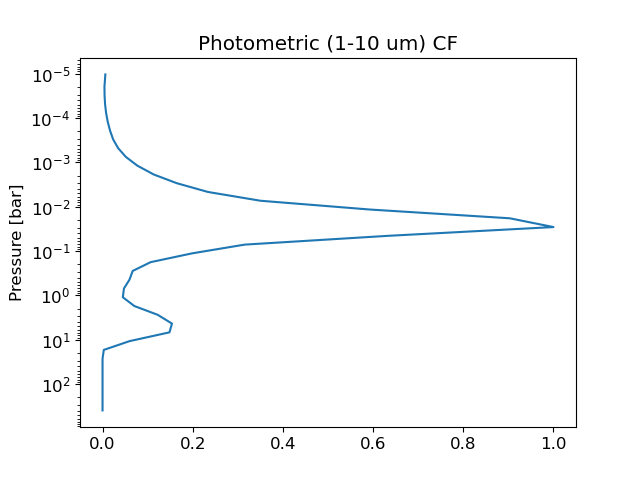

In [27]:
fig,ax = plt.subplots(1,1)

ax.plot(cf_phot, p)

ax.invert_yaxis()
ax.set_yscale("log")
ax.set_ylabel("Pressure [bar]")

ax.set_title("Photometric (%g-%g um) CF"%(wlmin, wlmax))

plt.show()

/tmp/user/27339/ipykernel_455188/3157121702.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(1,1)


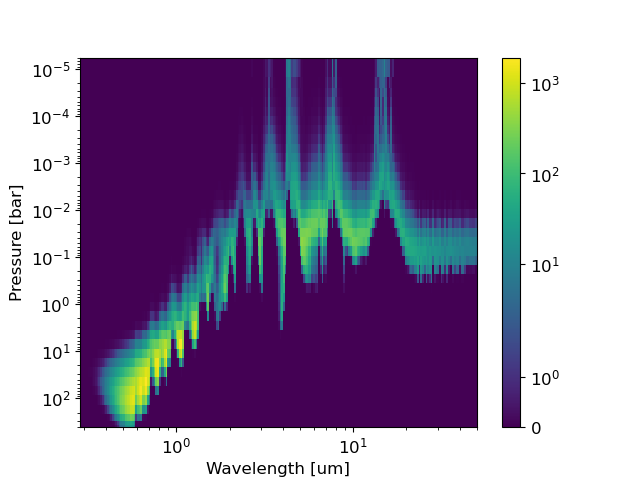

In [32]:
fig,ax = plt.subplots(1,1)

sm = ax.pcolormesh(x,p, cff, norm="symlog")

ax.invert_yaxis()
ax.set_yscale("log")
ax.set_ylabel("Pressure [bar]")

ax.set_xscale("log")
ax.set_xlabel("Wavelength [um]")

ax.set_xlim(right=50)

cbar = fig.colorbar(sm)

plt.show()